In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/spam.csv', encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data['v1'] = data['v1'].replace(['ham','spam'], [0, 1])
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# 결측치
data.isnull().sum(axis=0)

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<Axes: >

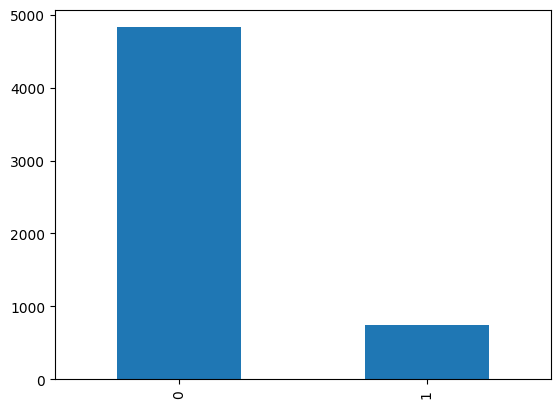

In [7]:
data['v1'].value_counts().plot(kind='bar')

In [8]:
X_data = data['v2']
y_data = data['v1']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)

In [11]:
X_train[:5]

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: v2, dtype: object

In [12]:
X_train_encoded[:5]

[[39, 39, 38, 9, 1439, 82, 2014, 3804, 82, 383, 9, 2553],
 [1, 62, 8, 1662, 1663, 21, 75, 2, 356, 2554, 8, 4, 291, 368],
 [40,
  2015,
  52,
  11,
  1664,
  157,
  18,
  3805,
  806,
  157,
  18,
  3806,
  337,
  18,
  3807,
  2016,
  576,
  9,
  44,
  43],
 [1, 369, 96, 577, 716, 25, 284, 262, 1665, 2555],
 [300, 164, 157, 73, 300, 150]]

In [13]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'on': 18, '2': 19, 'that': 20, 'now': 21, 'are': 22, 'so': 23, 'but': 24, 'not': 25, 'or': 26, 'can': 27, 'be': 28, 'at': 29, 'do': 30, 'if': 31, 'ur': 32, 'get': 33, 'with': 34, "i'm": 35, 'will': 36, 'just': 37, 'this': 38, 'no': 39, 'we': 40, '4': 41, 'up': 42, 'gt': 43, 'lt': 44, 'ok': 45, 'when': 46, 'out': 47, 'all': 48, 'go': 49, 'free': 50, 'what': 51, 'from': 52, 'how': 53, 'know': 54, 'then': 55, 'like': 56, 'good': 57, 'its': 58, 'got': 59, 'come': 60, 'time': 61, 'am': 62, 'day': 63, 'only': 64, 'was': 65, 'love': 66, 'send': 67, 'there': 68, 'want': 69, 'text': 70, 'he': 71, 'txt': 72, 'by': 73, 'as': 74, 'going': 75, 'stop': 76, 'about': 77, 'need': 78, "i'll": 79, 'one': 80, 'lor': 81, 'home': 82, 'still': 83, 'r': 84, 'da': 85, 'k': 86, 'n': 87, 'see': 88, 'sorry': 89, 'back': 90, 'today': 91, 'dont': 92

각 단어의 빈도수가 높을수록 낮은 정수가 부여됨

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
trainingVectors = vectorizer.fit_transform(X_train)
testingVectors = vectorizer.transform(X_test)

testingVectors.shape

(1115, 7612)

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(trainingVectors, y_train)

from  sklearn.metrics  import accuracy_score,precision_score, recall_score, f1_score
predicted = clf.predict(testingVectors)
print(f'Accuracy: {accuracy_score(y_test,predicted)}')
print(f'Precision: {precision_score(y_test,predicted)}')
print(f'Recall: {recall_score(y_test,predicted)}')
print(f'F1 Score: {f1_score(y_test,predicted)}')

Accuracy: 0.9479820627802691
Precision: 1.0
Recall: 0.6506024096385542
F1 Score: 0.7883211678832116


In [16]:
print(f'F1 Score: {f1_score(y_test,predicted,average="macro")}')

F1 Score: 0.8793344080724852


F1 Score
- macro average: 단순히 라벨에 대한 f1-score 평균
- weighted average: 라벨의 개수에 비례하게 가중치를 줌
- micro average: 전체 샘플에 대해 종합적으로 계산